In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import operator
from matplotlib.pyplot import subplot
import os
import math
#from lmfit import Minimizer, Parameters
os.chdir('/Users/kirahart/Dropbox/SWIRP/swirp_data_20190719/20190719_e/')
os.getcwd()

'/Users/kirahart/Dropbox/SWIRP/swirp_data_20190719/20190719_e'

In [3]:
waves=np.arange(8000,13000,50)
waves_um=np.arange(8,13,.05)
theta=np.linspace(0,math.pi,19)
def average(arr):
    arr1=arr[0]
    for i in range(1,len(arr)):
        arr1=np.add(arr1,arr[i])
    return(np.divide(arr1,len(arr)))
plt.style.use('seaborn-whitegrid')


In [4]:
angles=np.arange(100,290,10)

In [5]:
theta=angles

In [6]:
images1=[]
images2=[]
max1=[]
max2=[]
min1=[]
min2=[]
j=10
for i in range(len(waves)):
    if waves[i]<10000:
        name1='spectral_1_CAM1__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    else:
        name1='spectral_1_CAM1__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    image1=Image.open(name1)
    image2=Image.open(name2)
    im1=np.array(image1)[120:125,70:160]
    im2=np.array(image2)[122:127,85:175]
    images1.append(average(im1))
    images2.append(average(im2))
    max1.append(np.max(im1))
    min1.append(np.min(im1))
    max2.append(np.max(im2))
    min2.append(np.min(im2))



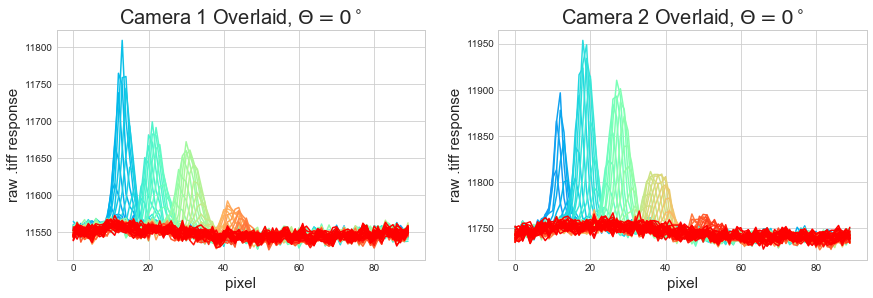

In [27]:
cm = plt.get_cmap('rainbow')

subplot(121)
for i in range(len(waves)):
    plt.plot(np.flip(images1[i]-100),c=cm(2*(waves[i]/1e4 - .7)))
    plt.title('Camera 1 Overlaid, $\Theta = 0 ^\circ$',size=20)
    plt.ylabel('raw .tiff response',size=15)
    plt.xlabel('pixel',size=15)
    #plt.legend()

subplot(122)
for i in range(len(waves)):
    plt.plot(np.flip(images2[i]-100),c=cm(2*(waves[i]/1e4 - .7)))
    plt.title('Camera 2 Overlaid, $\Theta = 0 ^\circ$',size=20)
    plt.ylabel('raw .tiff response',size=15)
    plt.xlabel('pixel',size=15)
    #plt.legend()

plt.subplots_adjust(left=None, right=2, bottom=0.1, top=0.9)
plt.show()

In [30]:
i1=[]
i2=[]
v1=[]
v2=[]
therm1=[]
therm2=[]
j=7
for i in range(len(waves)):
    if waves[i]<10000:
        name1='spectral_1_CAM1__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    else:
        name1='spectral_1_CAM1__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    image1=Image.open(name1)
    image2=Image.open(name2)
    im1=np.array(image1)[120:125,70:160]
    im2=np.array(image2)[122:127,85:175]
    t1=np.array(image1)[200:250,70:160]
    t2=np.array(image2)[200:250,70:160]
    therm1.append(t1)
    therm2.append(t2)
    index1, value1 = max(enumerate(np.flip(average(im1))), key=operator.itemgetter(1))
    index2, value2 = max(enumerate(np.flip(average(im2))), key=operator.itemgetter(1))
    stds1=[]
    stds2=[]
    for k in range(len(im1)):
        stds1.append(im1[k][index1])
        stds2.append(im2[k][index2])
    i1.append(np.std(stds1))
    v1.append(np.multiply(value1,response_correction_1[i]))
    i2.append(np.std(stds2))
    v2.append(np.multiply(value2,response_correction_2[i]))

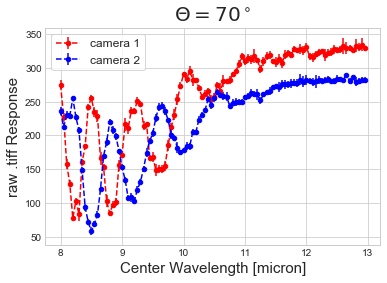

In [31]:
tb1=np.mean(therm1)
tb2=np.mean(therm2)


plt.errorbar(waves_um,np.subtract(v1,tb1),yerr=i1,ls='--', marker='.',c='r',label='camera 1',markersize=9)
plt.xlabel('Center Wavelength [micron]',size=15)
plt.ylabel('raw .tiff Response',size=15)
plt.title('$\Theta ='+str(angles[j]-100)+'  ^\circ$',size=20)
plt.errorbar(waves_um,np.subtract(v2,tb2),yerr=i2,ls='--', marker='.',c='b',label='camera 2',markersize=9)
plt.legend(frameon=True,fontsize=12)
plt.show()

In [32]:
i1=[]
i2=[]
v1=[]
v2=[]
therm1=[]
therm2=[]
i=60
for j in range(len(angles)):
    if waves[i]<10000:
        name1='spectral_1_CAM1__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    else:
        name1='spectral_1_CAM1__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    image1=Image.open(name1)
    image2=Image.open(name2)
    im1=np.array(image1)[120:125,70:160]
    im2=np.array(image2)[122:127,85:175]
    t1=np.array(image1)[200:250,70:160]
    t2=np.array(image2)[200:250,70:160]
    therm1.append(t1)
    therm2.append(t2)
    index1, value1 = max(enumerate(np.flip(average(im1))), key=operator.itemgetter(1))
    index2, value2 = max(enumerate(np.flip(average(im2))), key=operator.itemgetter(1))
    stds1=[]
    stds2=[]
    for k in range(len(im1)):
        stds1.append(im1[k][index1])
        stds2.append(im2[k][index2])
    i1.append(np.std(stds1))
    v1.append(value1)
    i2.append(np.std(stds2))
    v2.append(value2)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

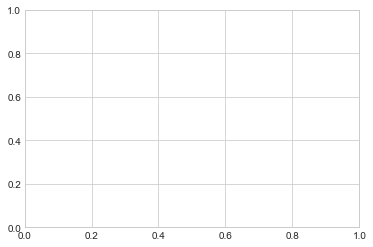

In [29]:
tb1=np.mean(therm1)
tb2=np.mean(therm2)


plt.errorbar(np.subtract(angles,100),np.subtract(v1,tb1),yerr=i1,ls='--', marker='.',c='r',label='camera 1',markersize=9)
plt.xlabel('Linear Polarizer [$^\circ$]',size=15)
plt.ylabel('raw .tiff Response',size=15)
plt.title('$\lambda $ = '+str(waves[i]/1e3)+' $\mu m$',size=20)
plt.errorbar(np.subtract(angles,100),np.subtract(v2,tb2),yerr=i2,ls='--', marker='.',c='b',label='camera 2',markersize=9)
plt.legend(frameon=True,fontsize=12)
plt.show()

In [33]:
i1=[]
i2=[]
v1=[]
v2=[]
therm1=[]
therm2=[]
i=10
for j in range(len(angles)):
    if waves[i]<10000:
        name1='spectral_1_CAM1__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    else:
        name1='spectral_1_CAM1__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        name2='spectral_1_CAM2__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
    image1=Image.open(name1)
    image2=Image.open(name2)
    im1=np.array(image1)[120:125,70:160]
    im2=np.array(image2)[122:127,85:175]
    t1=np.array(image1)[200:250,70:160]
    t2=np.array(image2)[200:250,70:160]
    therm1.append(t1)
    therm2.append(t2)
    index1, value1 = max(enumerate(np.flip(average(im1))), key=operator.itemgetter(1))
    index2, value2 = max(enumerate(np.flip(average(im2))), key=operator.itemgetter(1))
    stds1=[]
    stds2=[]
    for k in range(len(im1)):
        stds1.append(im1[k][index1])
        stds2.append(im2[k][index2])
    i1.append(np.std(stds1))
    v1.append(np.multiply(value1,response_correction_1[i]))
    i2.append(np.std(stds2))
    v2.append(np.multiply(value2,response_correction_2[i]))

In [34]:
def phaseterm(theta,epsilon,delta):
    return epsilon*np.cos(theta*2)*np.sin(delta)+np.sin(theta*2)*np.cos(delta)

def amplitudeterm(alpha):
    return (alpha)

def path1pol(theta,off,alpha,T1,epsilon,delta):
    return off+0.5*amplitudeterm(alpha) * T1 * (1 + phaseterm(theta,epsilon,delta))

def path2pol(theta,off, alpha,Rsum,Rdelta,epsilon,delta):
    return off+0.5*amplitudeterm(alpha)*(Rsum - Rdelta * phaseterm(theta,epsilon,delta))



In [35]:
# create a set of Parameters
par = Parameters()
par.add('alpha', value=1,min=1,max=2)
par.add('off1', value=1200,min=0,max=30000)
par.add('off2', value=1200,min=0,max=30000)
par.add('T1', value=50,min=.0,max=1000)
par.add('Rsum', value=50,min=.0,max=1000)
par.add('Rdelta',value=50,min=.0,max=1000)
par.add('epsilon', value=0, min= -1,max=1)
par.add('delta', value=1, min=0, max=2*math.pi)

NameError: name 'Parameters' is not defined

In [ ]:
# define objective function: returns the array to be minimized
def fit_function(par, theta=None, path1p=None, path2p=None, path1u=None, path2u=None):
    model1p = path1pol(theta,par['off1'],par['alpha'],par['T1'],par['epsilon'],par['delta'])
    model2p = path2pol(theta,par['off2'],par['alpha'],par['Rsum'],par['Rdelta'],par['epsilon'],par['delta'])
    resid1 = (path1p[:numAOI] - model1p)*10 #can weight different paths to affect residual more
    resid2 = (path2p[:numAOI] - model2p)*10
    return np.concatenate((resid1, resid2,))

In [ ]:
# do fit, here with leastsq model

path1p=v1
path2p=v2
numAOI=len(theta)
    
minner = Minimizer(fit_function, par, fcn_args=(theta, path1p, path2p))
result = minner.minimize()

# calculate final result
rpar=result.params.valuesdict()

# write error report
result.params.pretty_print()


In [ ]:
pixel=i
#model
path1pfit=path1pol(theta,rpar['off1'],rpar['alpha'],rpar['T1'],rpar['epsilon'],rpar['delta'])
path2pfit=path2pol(theta,rpar['off2'],rpar['alpha'],rpar['Rsum'],rpar['Rdelta'],rpar['epsilon'],rpar['delta'])

plt.plot(theta, path1p[:numAOI], 'rd')
plt.plot(theta, path2p[:numAOI], 'bd')
plt.plot(theta, path1pfit,'r--',theta, path2pfit,'b--')
#plt.ylim([0,1])
plt.xlabel('AOLP [rad]',size=12)
plt.ylabel('raw .tiff value',size=12)
plt.title('$\lambda = $ '+ str(round(waves_um[i],2))+' $\mu m$',size=20)
plt.gca().legend(('path 1 data','path 2 data','path 1 fit','path 2 fit'),
                 loc='best',frameon=True,fontsize=12)
#plt.plot(theta, result1.init_fit, 'k--',theta, result2.init_fit, 'k--')
#plt.plot(theta, result1.best_fit, 'b-',theta,result2.best_fit, 'r-')
plt.show()

In [23]:
def getdata(i):
    i1=[]
    i2=[]
    v1=[]
    v2=[]
    for j in range(len(angles)):
        if waves[i]<10000:
            name1='spectral_1_CAM1__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
            name2='spectral_1_CAM2__0'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        else:
            name1='spectral_1_CAM1__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
            name2='spectral_1_CAM2__'+str(waves[i])+'nm_angle'+str(angles[j])+'deg.tiff'
        image1=Image.open(name1)
        image2=Image.open(name2)
        im1=np.array(image1)[120:125,70:160]
        im2=np.array(image2)[122:127,85:175]
        t1=np.array(image1)[200:250,70:160]
        t2=np.array(image2)[200:250,70:160]
        therm1.append(t1)
        therm2.append(t2)
        index1, value1 = max(enumerate(np.flip(average(im1))), key=operator.itemgetter(1))
        index2, value2 = max(enumerate(np.flip(average(im2))), key=operator.itemgetter(1))
        stds1=[]
        stds2=[]
        for k in range(len(im1)):
            stds1.append(im1[k][index1])
            stds2.append(im2[k][index2])
        i1.append(np.std(stds1))
        v1.append(np.multiply(value1,response_correction_1[i]))
        i2.append(np.std(stds2))
        v2.append(np.multiply(value2,response_correction_2[i]))
    return(v1,v2)


In [24]:
alphas=[]
off1s=[]
off2s=[]
epsilons=[]
T1s=[]
Rsums=[]
Rdeltas=[]
deltas=[]
res1=[]
res2=[]
diff1s=[]
diff2s=[]

i=0
while i<len(waves):
    (path2p, path1p)=getdata(i)
    minner = Minimizer(fit_function, par, fcn_args=(theta, path1p, path2p))
    result = minner.minimize()
    rpar=result.params.valuesdict()
    path1pfit=path1pol(theta,rpar['off1'],rpar['alpha'],rpar['T1'],rpar['epsilon'],rpar['delta'])
    path2pfit=path2pol(theta,rpar['off2'],rpar['alpha'],rpar['Rsum'],rpar['Rdelta'],rpar['epsilon'],rpar['delta'])
    diff1=np.mean(np.abs(np.subtract(path1pfit,path1p)))
    diff2=np.mean(np.abs(np.subtract(path2pfit,path2p)))
    diff1s.append(diff1)
    diff2s.append(diff2)
    alphas.append(rpar['alpha'])
    off1s.append(rpar['off1'])
    off2s.append(rpar['off2'])
    epsilons.append(rpar['epsilon'])
    T1s.append(rpar['T1'])
    Rsums.append(rpar['Rsum'])
    Rdeltas.append(rpar['Rdelta'])
    deltas.append(rpar['delta'])
    i=i+1

In [ ]:
s=10
avg=[]
std=[]
waves2=np.linspace(8,13,10)
for j in range(10):
    mean=np.mean(np.split(np.array(off1s),s)[j])
    st=np.std(np.split(np.array(off1s),s)[j])
    avg.append(mean)
    std.append(std)

In [ ]:
plt.errorbar(waves2,avg,yerr=std,ls='--', marker='.',c='r',label='camera 1',markersize=9)
plt.show()